AUTHOR: Adedolapo Sharon Olatunji

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

LOAD WINE DATASET

In [3]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [9]:
# check for any null values
data.isnull().values.any()

False

In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

CHECK TARGET VARIABLES

In [12]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
data['alcohol'].value_counts()

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64

DATA ANALYSIS

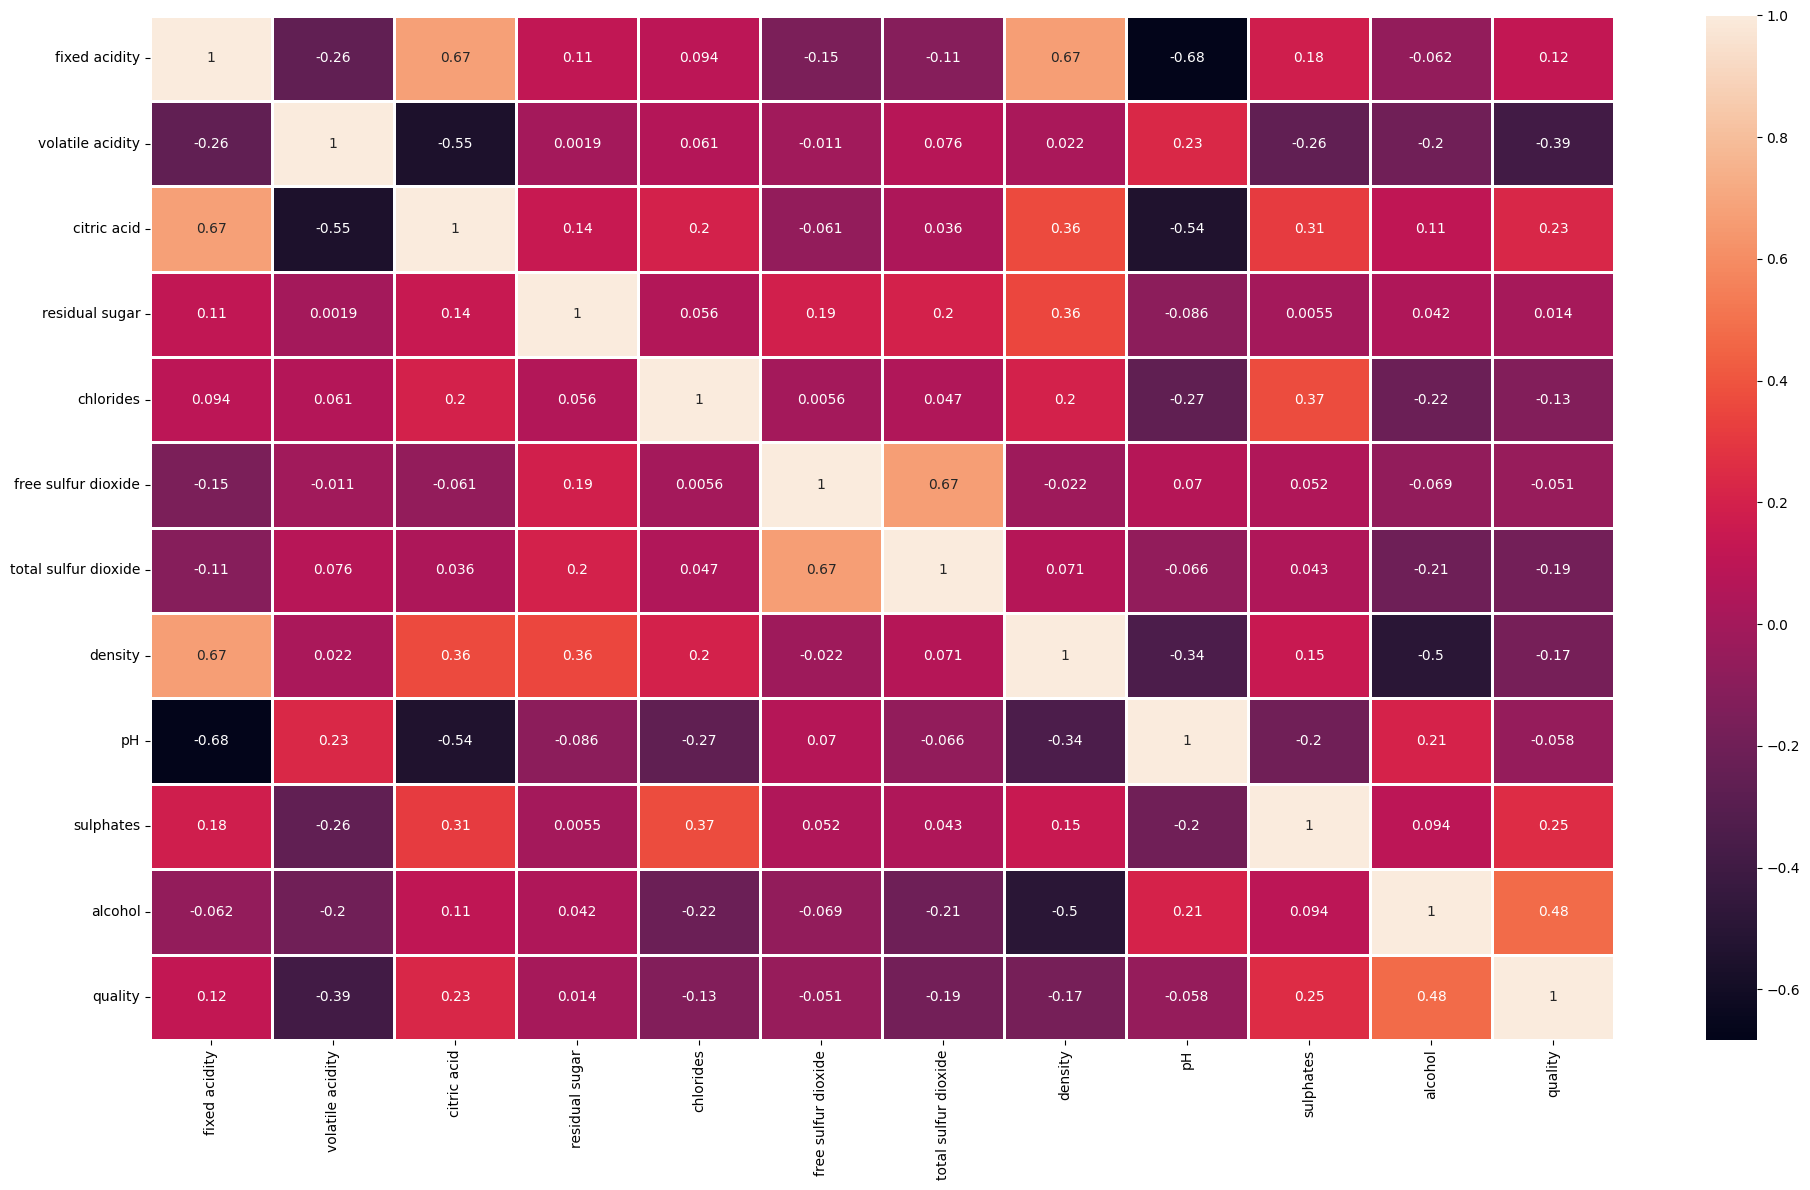

In [14]:
plt.figure(figsize=(20,12))
sb.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

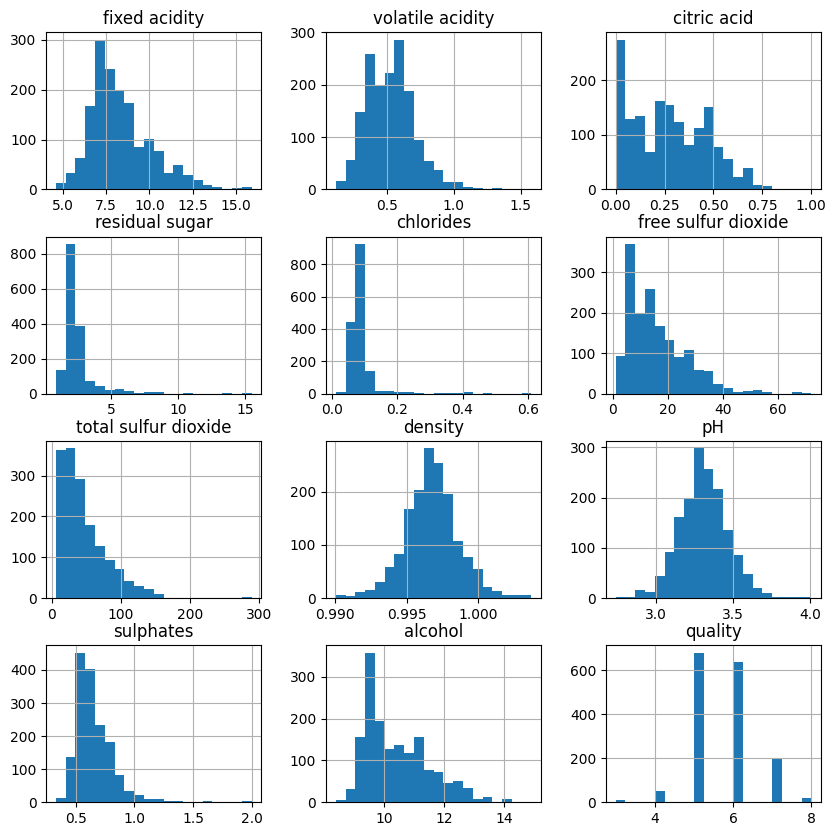

In [15]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

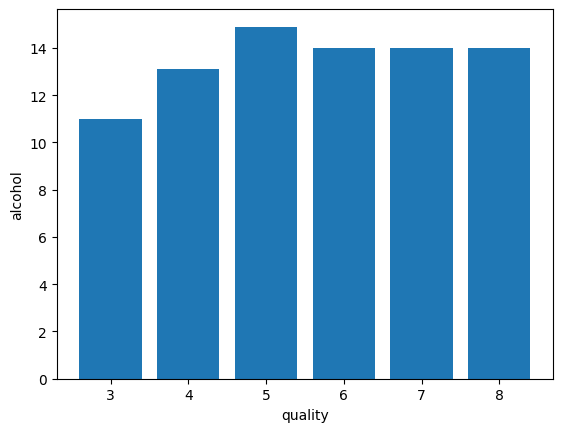

In [16]:
#bar plot
plt.bar(data['quality'], data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

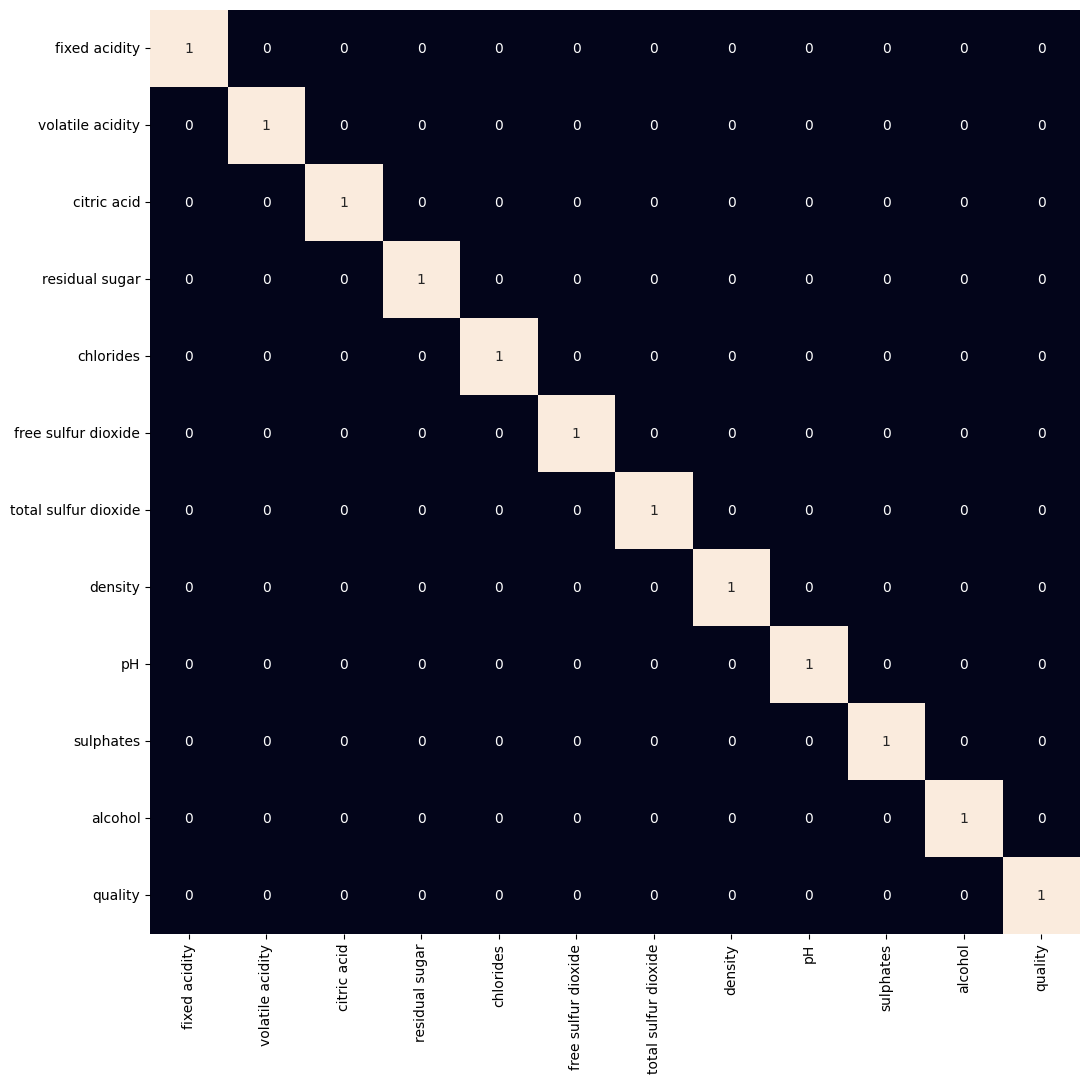

In [17]:
plt.figure(figsize=(12, 12))
sb.heatmap(data.corr() > 0.7, annot=True, cbar=False)
plt.show()

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

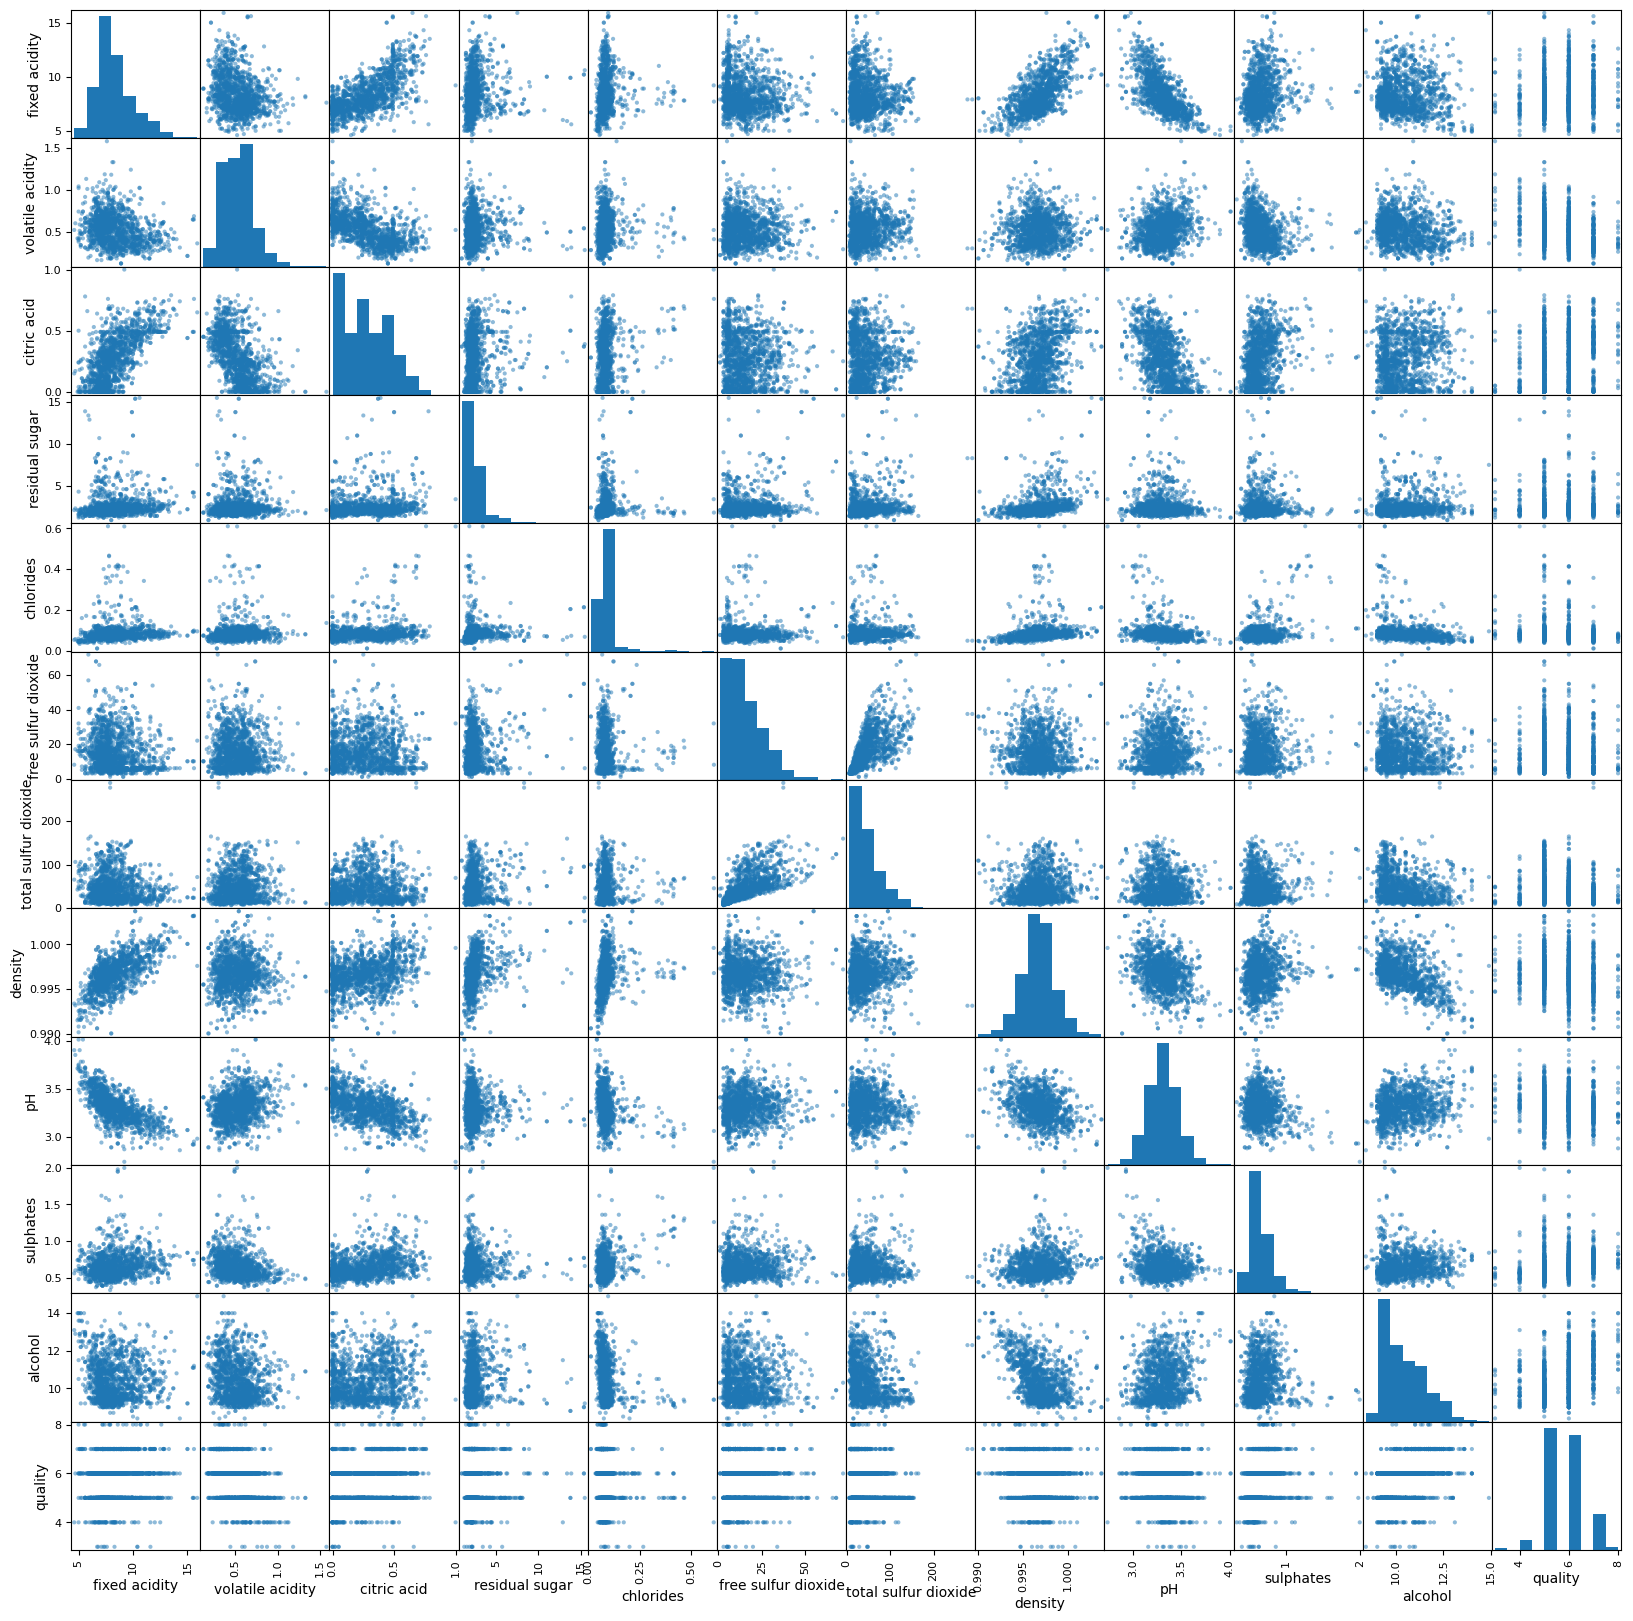

In [18]:
# Scatter plot matrix
import pandas as pd
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(20, 20))

DATA CLEANING

In [ ]:
data = data.drop('total sulfur dioxide', axis=1)

In [23]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [24]:
data['best quality'] = [1 if x > 5 else 0 for x in data.quality]
data.replace({'white': 1, 'red': 0}, inplace=True)

DATASET SPLITTING

In [25]:
features = data.drop(['quality', 'best quality'], axis=1)
target = data['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

((1279, 10), (320, 10))

In [26]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

MODEL

In [35]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(xtrain, ytrain)

    print(f'{models[i]} : ')
    print('Training Accuracy : {:.2%}'.format(metrics.roc_auc_score(ytrain, models[i].predict(xtrain))))
    print('Validation Accuracy : {:.2%}'.format(metrics.roc_auc_score(ytest, models[i].predict(xtest))))
    print()
    print()

LogisticRegression() : 
Training Accuracy : 72.87%
Validation Accuracy : 76.53%


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy : 100.00%
Validation Accuracy : 83.22%


SVC() : 
Training Accuracy : 76.99%
Validation Accuracy : 79.31%




In [36]:
metrics.classification_report(ytest, models[1].predict(xtest))

'              precision    recall  f1-score   support\n\n           0       0.80      0.84      0.82       147\n           1       0.86      0.82      0.84       173\n\n    accuracy                           0.83       320\n   macro avg       0.83      0.83      0.83       320\nweighted avg       0.83      0.83      0.83       320\n'